## Name: DEBARTHA PAUL

# GRIP Task 3: Exploratory Data Analysis - Retail

#### We have to perfom Exploratory Data Analysis on the dataset 'SampleSuperstore'

### Importing libraries and visualising the data

We first load the libraries required for our work and then read the dataset

In [1]:
#Importing the necessary libraries
library(RColorBrewer)

In [2]:
#Reading the dataset
df<-read.csv('SampleSuperstore.csv',header=T)
dim(df)#the dimensions of the dataset
head(df)#a brief preview of the dataset
names(df)#colimn names of the dataset
summary(df)#a brief summary of the dataset
df<-df[!duplicated(df),]#removing duplicate entries

[1] 9994   13

,Ship.Mode,Segment,Country,City,State,Postal.Code,Region,Category,Sub.Category,Sales,Quantity,Discount,Profit
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
2,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694


[1] "Ship.Mode"    "Segment"      "Country"      "City"         "State"       
 [6] "Postal.Code"  "Region"       "Category"     "Sub.Category" "Sales"       
[11] "Quantity"     "Discount"     "Profit"

  Ship.Mode           Segment            Country              City          
 Length:9994        Length:9994        Length:9994        Length:9994       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    State            Postal.Code       Region            Category        
 Length:9994        Min.   : 1040   Length:9994        Length:9994       
 Class :character   1st Qu.:23223   Class :character   Class :character  
 Mode  :character   Median :56430   Mode  :character   Mode  :character  
                    Mean   :55190                                        
                    3rd Qu.:90008                                        
                 

### Correlation between various observations

We then make a correlation matrix to know if there is any significant correlation between any two columns

In [3]:
cor_mat<-round(cor(df[,sapply(df,class)!='character']),3)
cor_mat#The correlation matrix
cor_mat[lower.tri(cor_mat,diag=T)]<-0
max(abs(cor_mat))

,Postal.Code,Sales,Quantity,Discount,Profit
Postal.Code,1.000,-0.023,0.013,0.059,-0.030
Sales,-0.023,1.000,0.201,-0.028,0.479
Quantity,0.013,0.201,1.000,0.009,0.066
Discount,0.059,-0.028,0.009,1.000,-0.220
Profit,-0.030,0.479,0.066,-0.220,1.000


[1] 0.479

We find that the maximum correlation coefficient is 0.479 which implies there is no significant correlation between the columns of the data.

### Exploratory Data Analysis

We proceed to the analysis of the dataset

#### Division based on different attributes

We first plot some graphs for division of the data based on various attributes

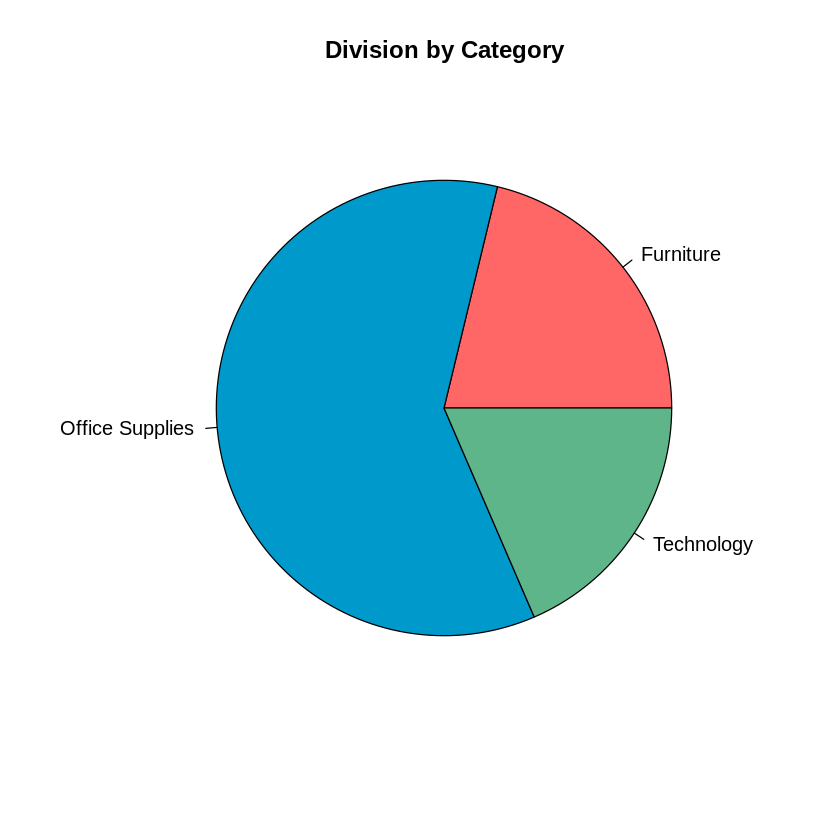

In [4]:
cat_div<-table(df$Category)
pie(cat_div,col=c('#FF6666','#0099CC','#5eb58a'),main='Division by Category')

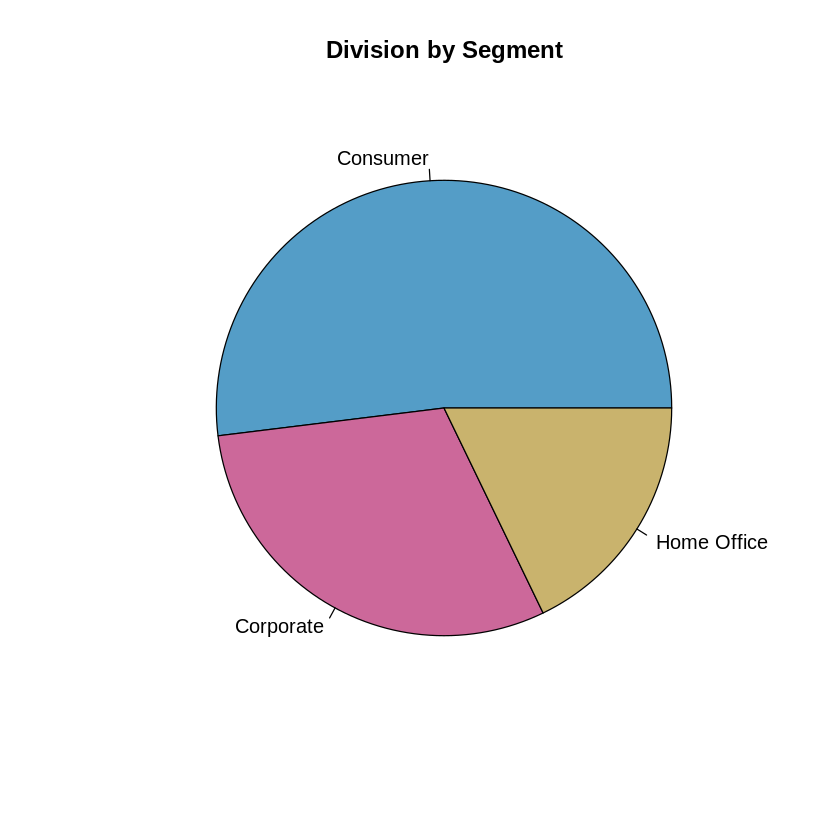

In [5]:
seg_div<-table(df$Segment)
pie(seg_div,col=c('#549dc7','#cc689a','#c9b36d'),main='Division by Segment')

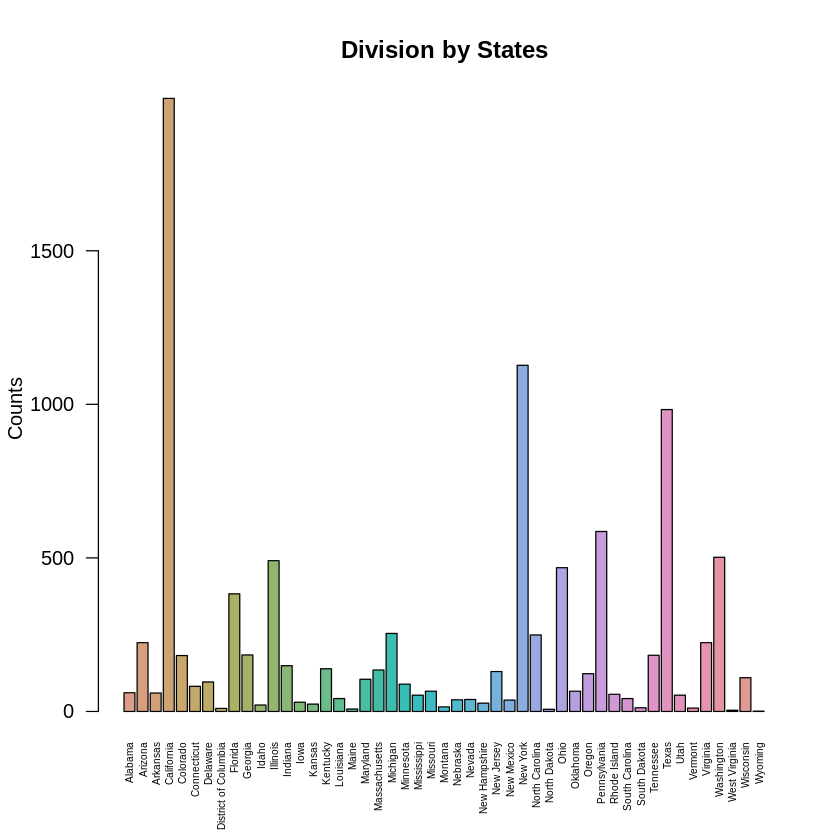

In [6]:
state_div<-table(df$State)
barplot(state_div,las=2,cex.names=0.5,
        col=hcl.colors(n=length(unique(df$State)),"dynamic"),
        ylab='Counts',main='Division by States')

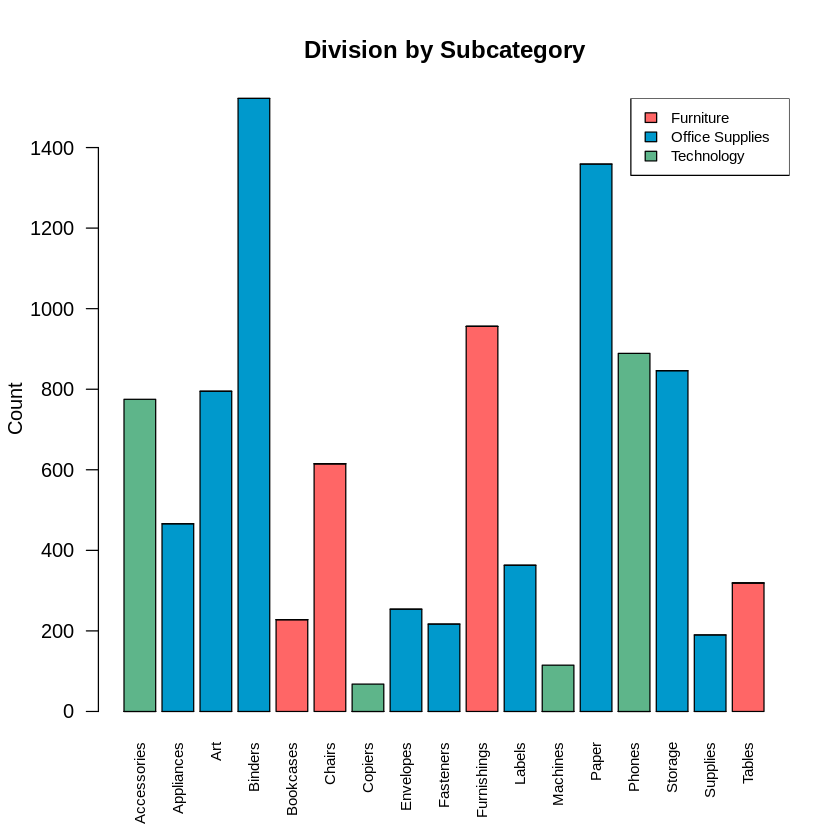

In [7]:
cat_Subcat<-table(df$Category,df$Sub.Category)
barplot(cat_Subcat,las=2,col=c('#FF6666','#0099CC','#5eb58a'),
        cex.names=0.75,main='Division by Subcategory',ylab='Count')
legend('topright',rownames(cat_Subcat),fill=c('#FF6666','#0099CC','#5eb58a'),cex=0.75)

#### Histograms

We draw some histograms to find out about the nature of the distribution of the data

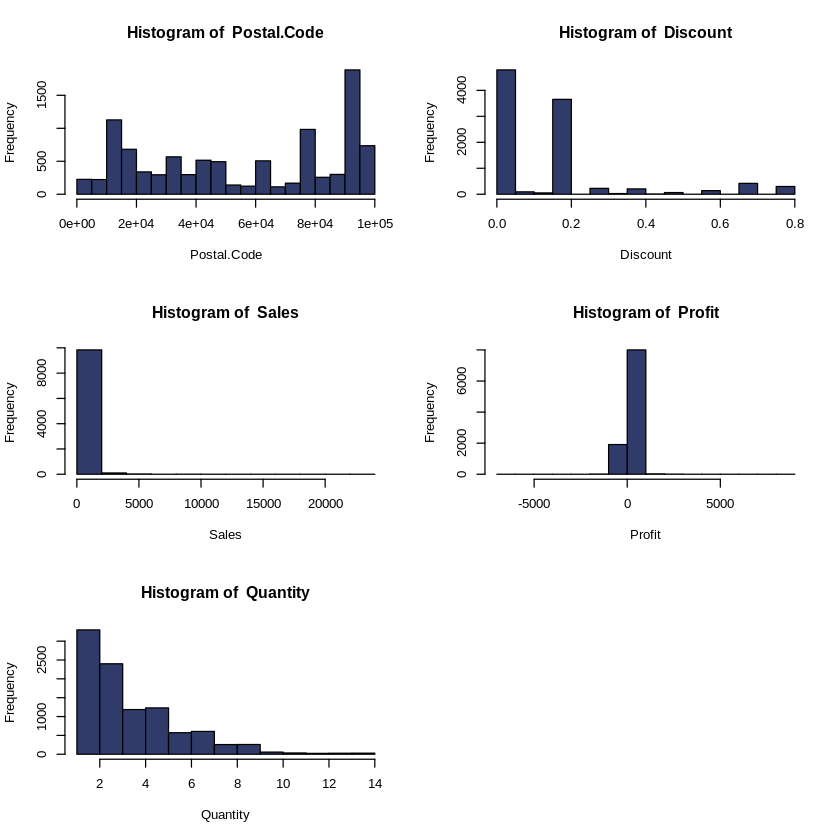

In [8]:
par(mfcol=c(3,2))
for(i in 1:ncol(df))
{
    if (class(df[,i])!='character')
    {
        hist(df[,i],xlab=names(df)[i],main=paste('Histogram of ',
                                                 names(df)[i]),col='#313b69')
    }
}

The above histograms suggest that the data is not normally distributed.

#### Table of Quantity by Shipping mode

Next we create a table for the quantity of items sold categorised by mode of shipping

In [9]:
table(df$Ship.Mode,df$Quantity)

                
                    1    2    3    4    5    6    7    8    9   10   11   12
  First Class     140  385  363  196  189   80   87   41   36   10    4    2
  Same Day         57  144  125   65   60   26   35    8   16    2    3    0
  Second Class    179  457  473  214  248  122  109   54   50   12    6    7
  Standard Class  523 1413 1439  711  733  344  375  154  156   33   21   14
                
                   13   14
  First Class       3    1
  Same Day          0    1
  Second Class      5    7
  Standard Class   19   20

#### Pairs plot

A pairs plot gives a detailed graphical summary regarding the relationships between the different variables in the data. We create a pairs plot for this dataset categorised by Sub-Category.

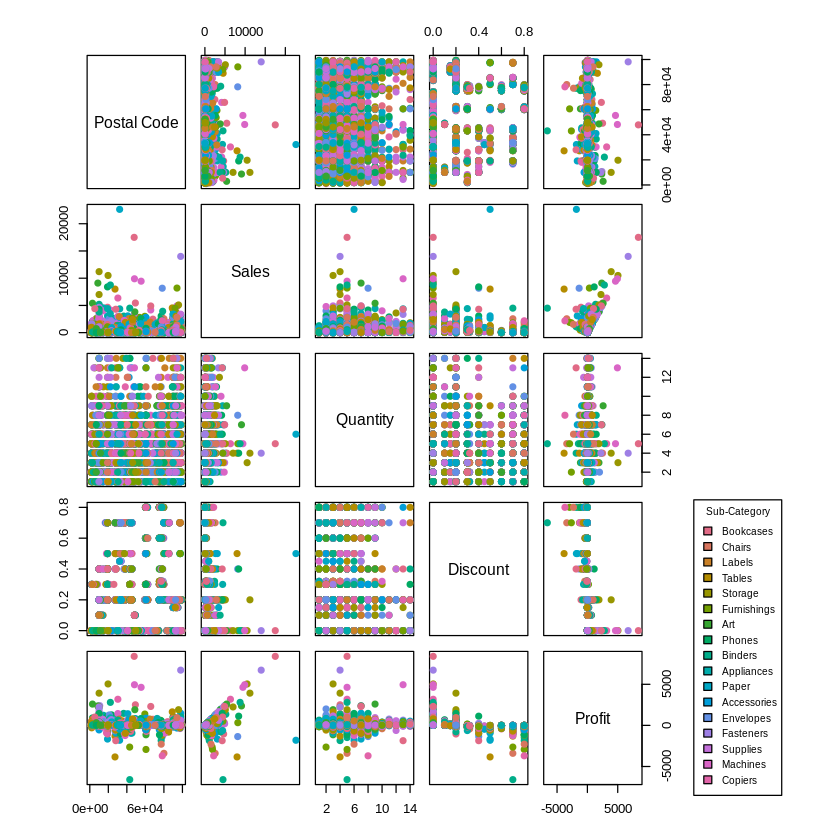

In [10]:
pairs(~df$Postal.Code+df$Sales+df$Quantity+df$Discount+df$Profit,
      labels=c('Postal Code','Sales','Quantity','Discount','Profit'),
      col=hcl.colors(length(unique(df$Sub.Category)),'dark 3'),
      pch=19,oma=c(3,5,3,12))
par(xpd=T)
legend("bottomright",fill=hcl.colors(length(unique(df$Sub.Category)),'dark 3'),
       legend=c(unique(df$Sub.Category)),cex=0.5,title='Sub-Category')

#### Heat maps

We then draw some heat maps for representing sales and profits by different attributes over all the states and cities

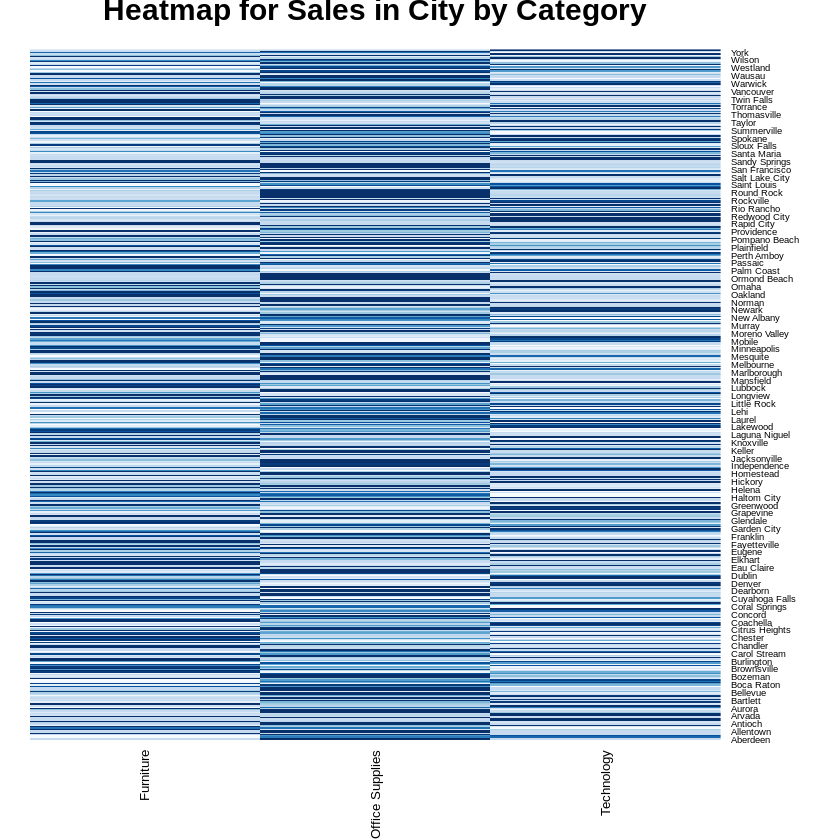

In [11]:
cat_city_sales<-ftable(with(df,tapply(Sales,list(Category,City),sum)))
cat_city_sales[which(is.na(cat_city_sales)==T)]<-0
data<-as.matrix(cat_city_sales)
heatmap(t(data),Colv=NA,Rowv=NA,cexCol=0.8,
        col=colorRampPalette(brewer.pal(9,"Blues"))(25),
        main='Heatmap for Sales in City by Category')

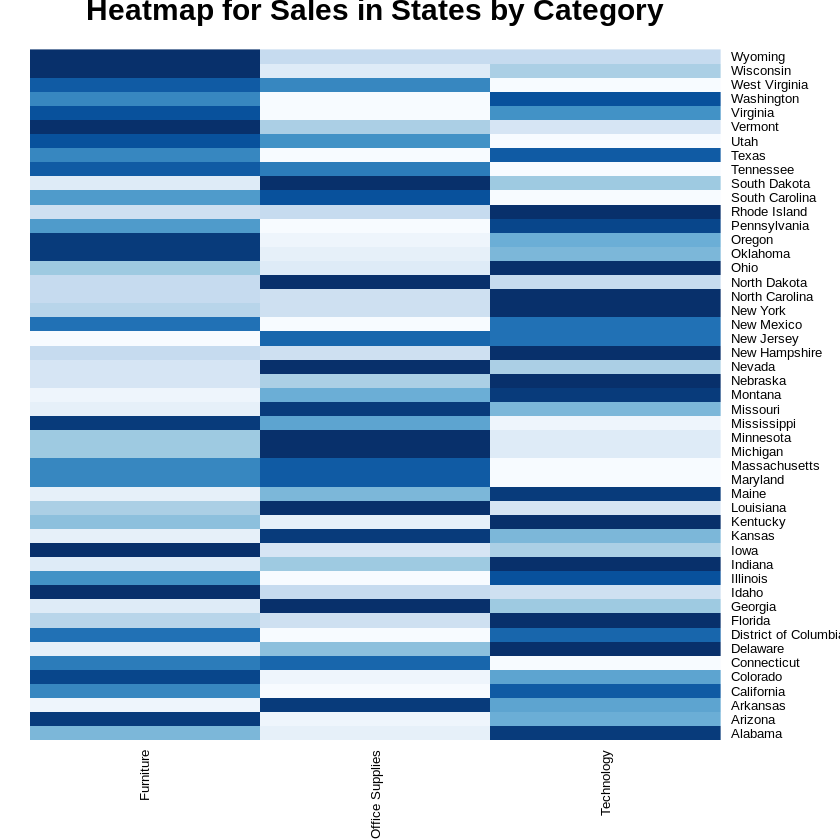

In [12]:
cat_state_sales<-ftable(with(df,tapply(Sales,list(Category,State),sum)))
cat_state_sales[which(is.na(cat_state_sales)==T)]<-0
data<-as.matrix(cat_state_sales)
heatmap(t(data),Colv=NA,Rowv=NA,cexCol=0.8,
        col=colorRampPalette(brewer.pal(9,"Blues"))(25),
        main='Heatmap for Sales in States by Category')

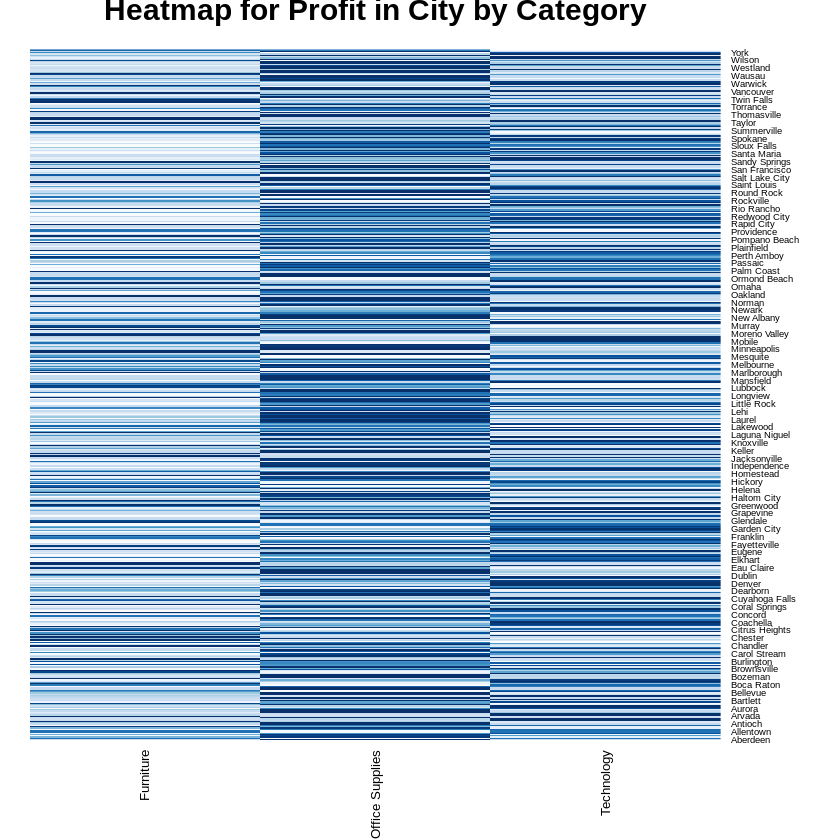

In [13]:
cat_city_pro<-ftable(with(df,tapply(Profit,list(Category,City),sum)))
cat_city_pro[which(is.na(cat_city_pro)==T)]<-0
data<-as.matrix(cat_city_pro)
heatmap(t(data),Colv=NA,Rowv=NA,cexCol=0.8,
        col=colorRampPalette(brewer.pal(9,"Blues"))(25),
        main='Heatmap for Profit in City by Category')

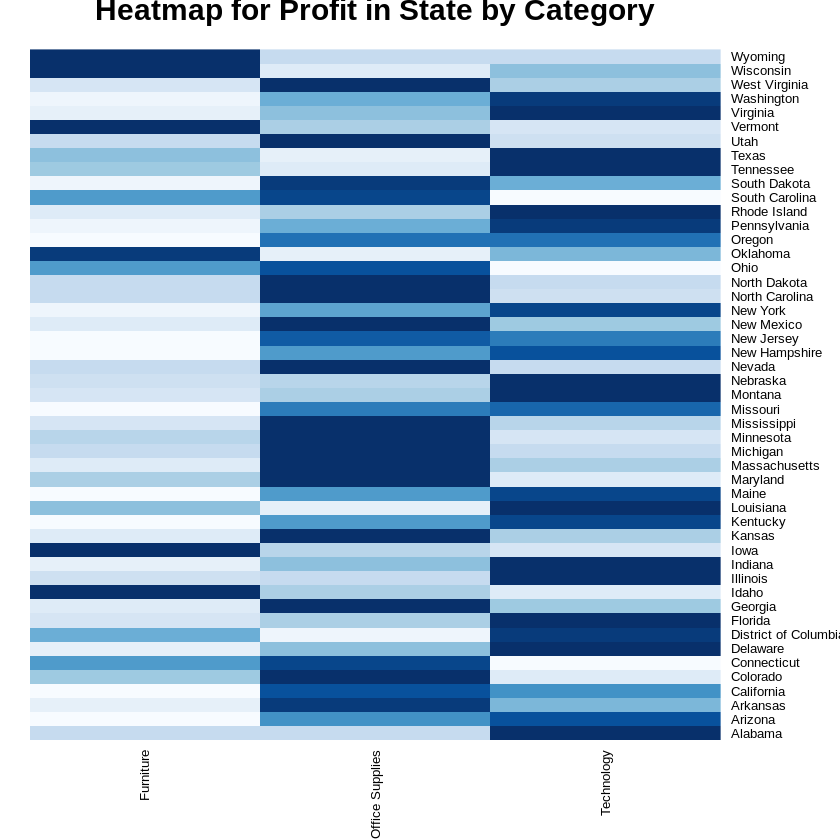

In [14]:
cat_state_pro<-ftable(with(df,tapply(Profit,list(Category,State),sum)))
cat_state_pro[which(is.na(cat_state_pro)==T)]<-0
data<-as.matrix(cat_state_pro)
heatmap(t(data),Colv=NA,Rowv=NA,cexCol=0.8,
        col=colorRampPalette(brewer.pal(9,"Blues"))(25),
        main='Heatmap for Profit in State by Category')

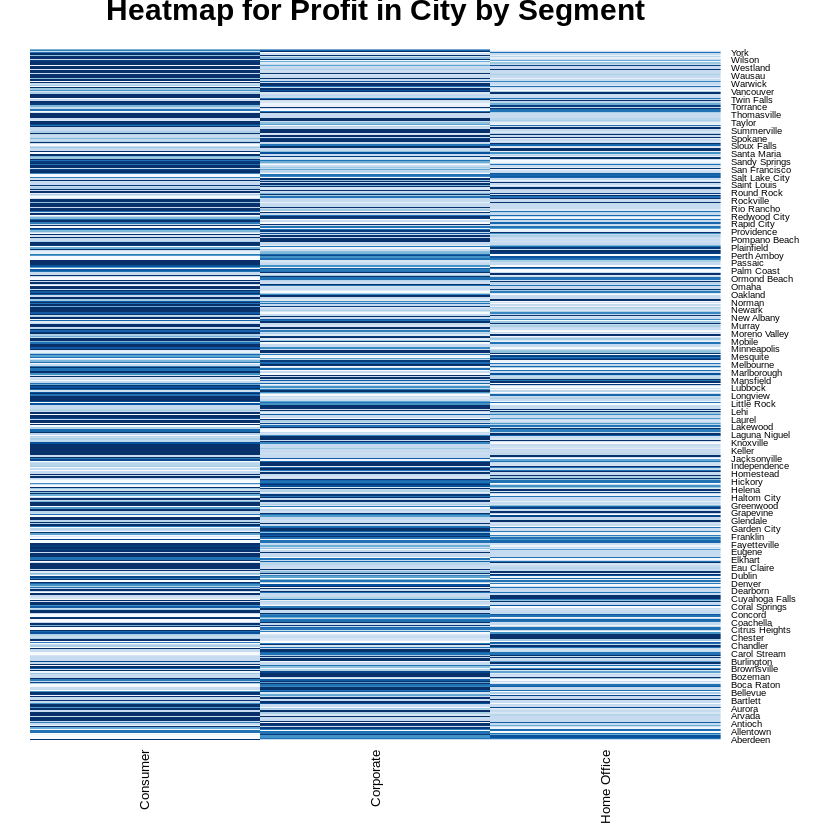

In [15]:
seg_city_pro<-ftable(with(df,tapply(Profit,list(Segment,City),sum)))
seg_city_pro[which(is.na(seg_city_pro)==T)]<-0
data<-as.matrix(seg_city_pro)
heatmap(t(data),Colv=NA,Rowv=NA,cexCol=0.8,
        col=colorRampPalette(brewer.pal(9,"Blues"))(25),
        main='Heatmap for Profit in City by Segment')

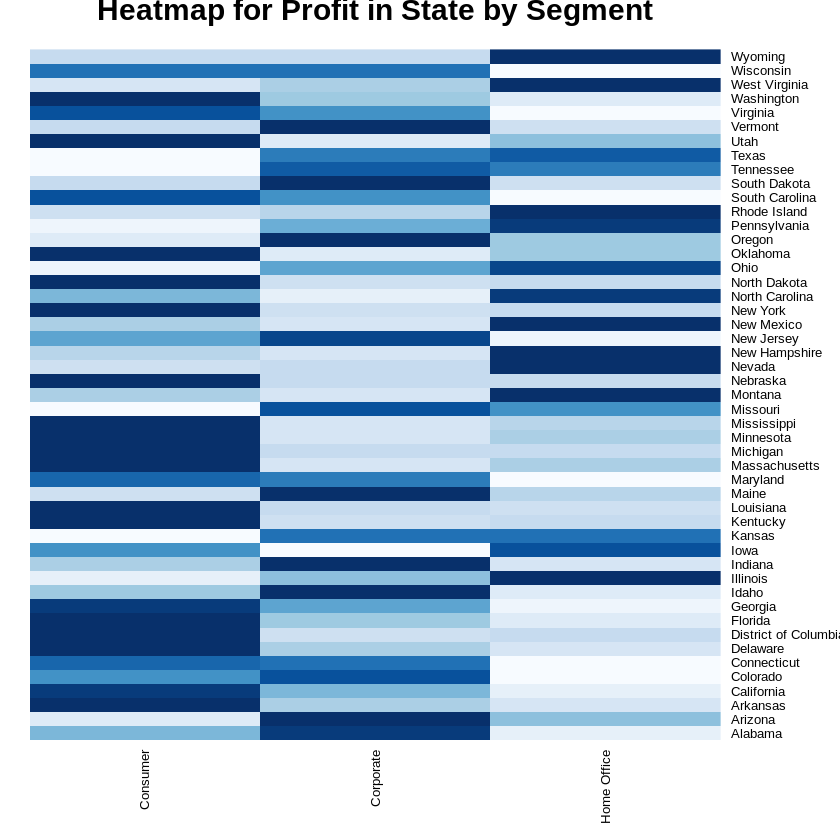

In [16]:
seg_state_pro<-ftable(with(df,tapply(Profit,list(Segment,State),sum)))
seg_state_pro[which(is.na(seg_state_pro)==T)]<-0
data<-as.matrix(seg_state_pro)
heatmap(t(data),Colv=NA,Rowv=NA,cexCol=0.8,
        col=colorRampPalette(brewer.pal(9,"Blues"))(25),
        main='Heatmap for Profit in State by Segment')

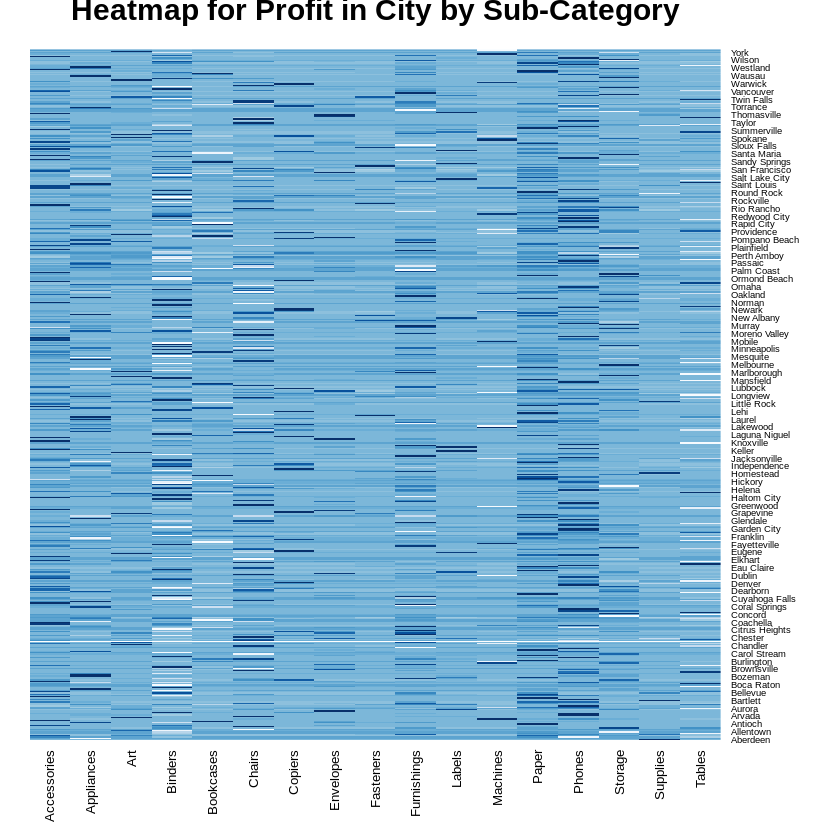

In [17]:
subcat_city_pro<-ftable(with(df,tapply(Profit,list(Sub.Category,City),sum)))
subcat_city_pro[which(is.na(subcat_city_pro)==T)]<-0
data<-as.matrix(subcat_city_pro)
heatmap(t(data),Colv=NA,Rowv=NA,cexCol=0.8,
        col=colorRampPalette(brewer.pal(9,"Blues"))(25),
        main='Heatmap for Profit in City by Sub-Category')

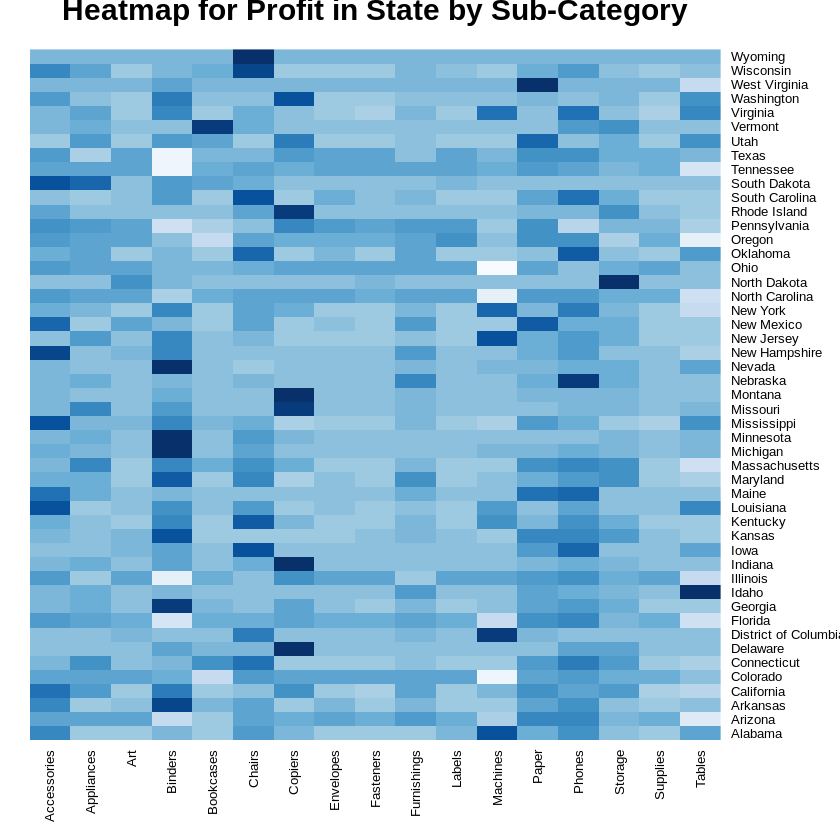

In [18]:
subcat_state_pro<-ftable(with(df,tapply(Profit,list(Sub.Category,State),sum)))
subcat_state_pro[which(is.na(subcat_state_pro)==T)]<-0
data<-as.matrix(subcat_state_pro)
heatmap(t(data),Colv=NA,Rowv=NA,cexCol=0.8,
        col=colorRampPalette(brewer.pal(9,"Blues"))(25),
        main='Heatmap for Profit in State by Sub-Category')

#### Sales and Profit

Finally, we draw a sales and profit chart by different Sub-Categories

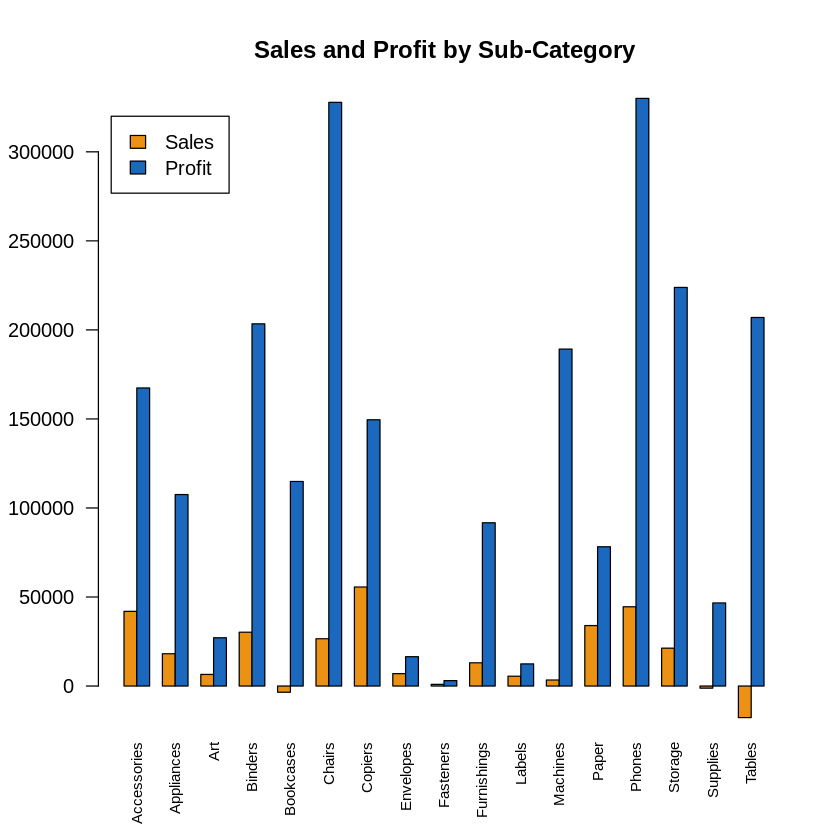

In [19]:
Profit<-as.data.frame(tapply(df$Profit,df$Sub.Category,sum))
Sales<-as.data.frame(tapply(df$Sales,df$Sub.Category,sum))
barplot(t(as.matrix(cbind(Profit,Sales))),las=2,col=c('#eb9113','#1b68bf'),
        beside=T,main='Sales and Profit by Sub-Category',cex.names=0.75)
legend(x=0,y=320000,c('Sales','Profit'),fill=c('#eb9113','#1b68bf'))